## Lasso and Elastic Net for Natural gas dataset
Further to linear regression carried out on the natural gas dataset, we now estimate Lasso and Elastic-Net regression models the data set. We will firstly import the required libraries for the analysis 

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

Automatically created module for IPython interactive environment


The next step is to load the data as pandas data frame. 

In [2]:
import pandas as pd
# Read the data set
df=pd.read_excel("data/DataSet_GasPrice_ Outlier_Removed.xlsx")
df.head()

,Days,Date,AveCoalPrice,OilPrice,GrossGasProd,TotGasCons,GasPrice,Weather,WSTAT,GasPriceStatus,GPSAT,color
0,245,2008-12-31,57.22,41.12,2227.028,2399.702,5.82,WINTER,1,HIGH,1,1
1,276,2009-01-31,54.37,41.71,2251.938,2729.715,5.24,WINTER,1,HIGH,1,1
2,304,2009-02-28,52.30,39.09,2074.167,2332.539,4.52,WINTER,1,HIGH,1,1
3,335,2009-03-31,44.34,47.94,2262.488,2170.709,3.96,WINTER,1,HIGH,1,1
4,365,2009-04-30,41.92,49.65,2147.856,1741.293,3.50,SPRING,0,HIGH,1,1


Now, select the needed variables (columns), define it as a new pandas dataframe and then use it tp create a numpy array suitable for regression

In [3]:
# create new dataframe of independent variables
dfvar = df[['AveCoalPrice', 'OilPrice', 'GrossGasProd', 'TotGasCons']]

In [4]:
# create numpy arrays of the dependent and independent variables with n_samples, n_features = 104, 4
X = dfvar.values
Y = df.GasPrice.values

In [5]:
# What are the shapes of the variables?
X.shape

(104, 4)

In [6]:
Y.shape

(104,)

We will now split the data in train set and test set

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.33, random_state=42)

### LASSO REGRESSION
We now carry out lasso regression. First, let us import the lasso library

In [8]:
#import lasso library
from sklearn.linear_model import Lasso

In [9]:
alpha = 0.1
lasso = Lasso(alpha=alpha)

In [10]:
# let us predict the test data using a fit of the train data
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)

The next step is to calculate and print the score

In [11]:
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.417360


The lasso score shows that 41.7 % of the variation in the Gas Price for the test case is explained by the independent variables.  

### ElasticNet REGRESSION
We now carry out regression using Elastic Net. Just like we did in lasso regression, we will first, import the Elastic Net library and generate enet

In [12]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

We will use the enet calculated to predict the test data using a fit of the train data. Subsequently, we will calculate and print the enet score

In [13]:
y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.422562


Compared to the lasso score (41.7%), elasticnet generates an improved score of 42.2%. 

In [15]:
enet.coef_

array([ 0.02719368,  0.00666163, -0.00212097,  0.00042385])

In [17]:
lasso.coef_

array([ 0.02533   ,  0.00682727, -0.00214521,  0.00042768])

For comparison, let us generate ordinary least square parameters using linear regression 

In [18]:
from sklearn import datasets, linear_model
model = linear_model.LinearRegression()

In [20]:
# Train the model using the training sets
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# The coefficients
model.coef_  

array([ 0.03173612,  0.00625294, -0.00206199,  0.00041447])

In [22]:
y_pred_model = model.fit(X_train, y_train).predict(X_test)
r2_score_model = r2_score(y_test, y_pred_model)
print(model)
print("r^2 on test data : %f" % r2_score_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
r^2 on test data : 0.434516


We now generate a plot that compares the coefficients generated from Lasso and Elastic Net. 

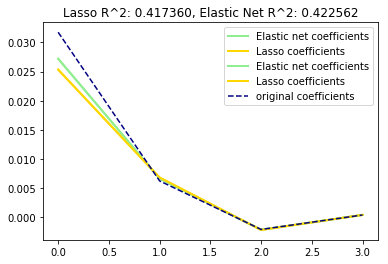

In [23]:
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(model.coef_, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

### Train error vs Test error
Using the Elastic-Net regression model, we will show how the performance of an estimator on the test data is not the same as the performance on training data. The performance is measured using the explained variance (R^2). As the regularization increases the performance on train decreases while the performance on test is optimal within a range of values of the regularization parameter.

First, let us compute train and test errors

In [25]:
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

Optimal regularization parameter : 1e-05


Secondly, we estimate the coefficients on the data with optimal regularization parameter

In [28]:
# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, Y).coef_
coef_

array([ 0.05518913,  0.00292164, -0.00167769,  0.00039159])

Finally, we plot the results of the functions

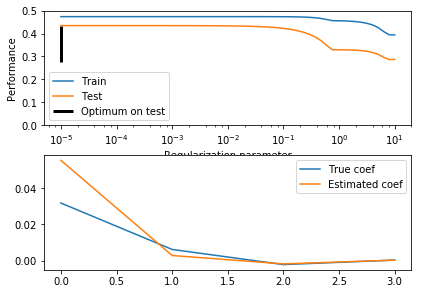

In [31]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 0.5])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
plt.subplot(2, 1, 2)
plt.plot(model.coef_, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()